## Building a GPT

Loosely derived from Karpathy's [Zero To Hero](https://karpathy.ai/zero-to-hero.html) video on GPT. Significant changes for my understanding (kma@pebblebed.com)

In [9]:
# %pip install datasets transformers zstandard matplotlib
import torch
import text_data
import conv_text
import numpy as np
import pandas as pd


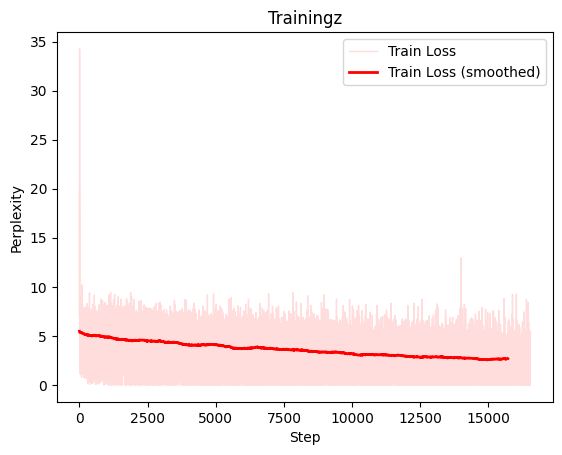

In [16]:
tdat = pd.read_csv('lightning_logs/version_4/metrics.csv')
train = tdat.train_loss[~np.isnan(tdat.train_loss)]
if True:
    import matplotlib.pyplot as plt

    xspace = np.linspace(0, len(train), len(train))
    fsz = max(20, len(train)//20)
    filter = np.ones(fsz)/fsz
    # filter =  np.linspace(0.25, 1.75, num=fsz)/fsz

    plt.plot( train, label = 'Train Loss', color='#fdd', linewidth=1)
    plt.plot( np.convolve(train, filter, mode='valid'), label = 'Train Loss (smoothed)', color='r', linewidth=2)
    if False and 'val_loss' in tdat:
        val = tdat.val_loss[~np.isnan(tdat.val_loss)]
        plt.plot( val, label = 'Val\'n Loss', color='#ccf', linewidth=1)
        plt.plot( np.convolve(val, filter, mode='valid'), label = 'Val\'n Loss (smoothed)', color='b', linewidth=2)

    plt.xlabel('Step')
    plt.ylabel('Perplexity')
    plt.legend(loc='upper right')
    plt.title('Trainingz')
    plt.show()


In [17]:
np.mean(tdat.train_loss[-1000:])


2.7271981093102244

In [15]:
tdat.val_loss[~np.isnan(tdat.val_loss)]

9006    37.822571
Name: val_loss, dtype: float64